In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Step 2: Load the dataset
data = pd.read_csv("C:/Users/1234/Downloads/iphone_purchase_records.csv")

In [4]:
# Step 3: Data Preprocessing
# Check for missing values and handle them if needed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


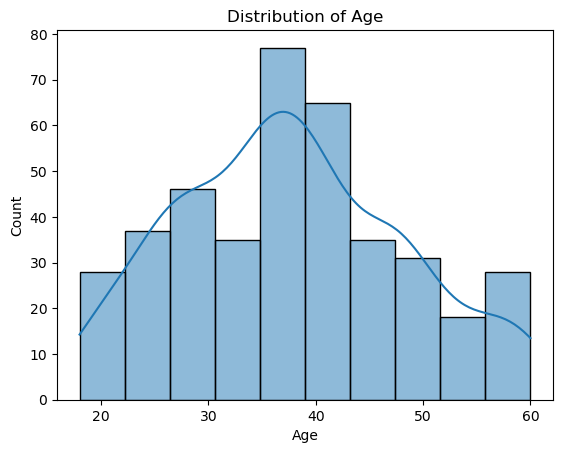

In [5]:
# Step 4: Exploratory Data Analysis (EDA)
# Visualize the distribution of each feature
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()


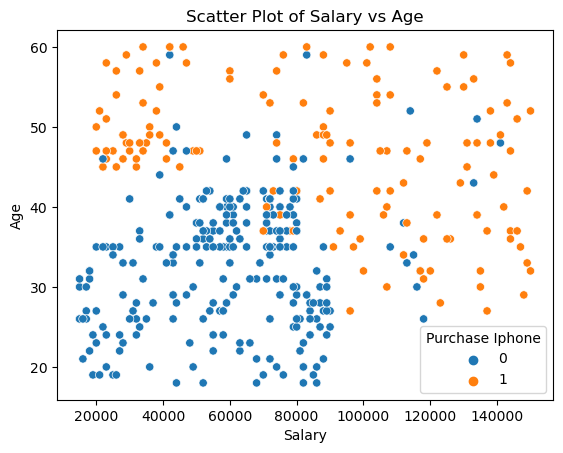

In [10]:
sns.scatterplot(x='Salary', y='Age', hue='Purchase Iphone', data=data)
plt.title('Scatter Plot of Salary vs Age')
plt.show()

In [11]:
# Step 5: Feature Engineering
# Extract features and target variable
X = data[['Gender', 'Age', 'Salary']]
y = data['Purchase Iphone']

In [12]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [13]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Step 8: Model Training using KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Step 9: Model Evaluation
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [17]:
# Step 10: Insights and Inference
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49  3]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.89      0.86      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



In [18]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,y_pred)

0.9125

<Axes: >

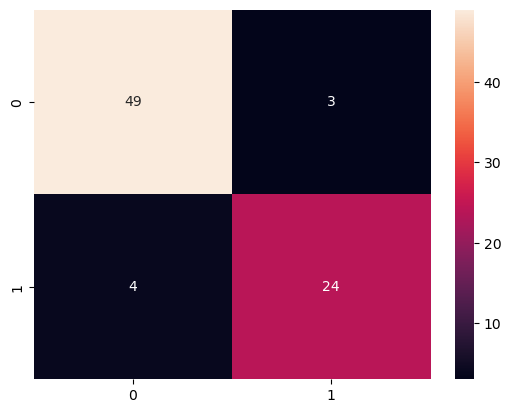

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [22]:
from sklearn.metrics import r2_score

In [23]:
dd  = pd.DataFrame(y_pred, columns = ['Predicted'])

In [24]:
dd['Actual'] = y_test.values

In [25]:
print("The Strength of the Model is - ",r2_score(dd['Actual'], dd['Predicted']))   #### # Strendth of the Model

The Strength of the Model is -  0.6153846153846154
